## Trabalho de Conclusão de Semestre - Redes Neurais e Algoritmos Genéticos
# NOME DO TRABALHO

#### Autores:
Alice Kageyama (220049), Haziel Sixto Baden Sanchez Hermoza (220065), Monyque Karoline de Paula Silva (220063), Pedro Thomazelli Ferreira (220058)

<hr>

In [1]:
# Importações:

import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsolutePercentageError

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Setup inicial:

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
ARQUIVO = 'dados/elnino.csv'

df = pd.read_csv(ARQUIVO, header=0)
df = df.drop(columns=['Observation', ' Date'])

# Removendo dados faltantes:
df = df[df != '.']
df.dropna(how='any', inplace=True)
df = df.astype(float)
df = df.reset_index(drop=True)

display(df)

,Year,Month,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,93.0,5.0,9.0,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
1,93.0,5.0,10.0,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
2,93.0,5.0,11.0,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
3,93.0,5.0,12.0,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4,93.0,5.0,13.0,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...,...,...,...
93930,98.0,6.0,10.0,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
93931,98.0,6.0,11.0,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
93932,98.0,6.0,12.0,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
93933,98.0,6.0,13.0,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


In [3]:
# Definindo os dados de treino e teste:

FEATURES = [df.columns[0],df.columns[1],df.columns[2],df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[7],df.columns[8]]
TARGET = [df.columns[9]]

indices = df.index

indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

x_treino = df_treino.reindex(FEATURES, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)
x_teste = df_teste.reindex(FEATURES, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

In [4]:
# Normalização:

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(x_treino)
normalizador_y.fit(y_treino)

x_treino = normalizador_x.transform(x_treino)
y_treino = normalizador_y.transform(y_treino)
x_teste = normalizador_x.transform(x_teste)
y_teste = normalizador_y.transform(y_teste)

In [5]:
# Criando tensores:

x_treino = torch.tensor(x_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32)
x_teste = torch.tensor(x_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32)

In [6]:
# Checando os dados:

print(x_treino)
print()
print(y_treino)

tensor([[0.4444, 1.0000, 0.3000,  ..., 0.4110, 0.6862, 0.7207],
        [0.8889, 0.4545, 0.1667,  ..., 0.5169, 0.6130, 0.8314],
        [0.7778, 0.9091, 0.0000,  ..., 0.4195, 0.6841, 0.4884],
        ...,
        [0.4444, 0.3636, 0.4333,  ..., 0.3856, 0.7301, 0.6780],
        [0.8889, 0.6364, 0.0000,  ..., 0.3051, 0.6025, 0.7359],
        [0.3333, 0.4545, 0.9000,  ..., 0.4831, 0.6506, 0.5810]])

tensor([[0.8132],
        [0.8444],
        [0.4786],
        ...,
        [0.7121],
        [0.8444],
        [0.5377]])


In [7]:
# Criando a classe da rede neural:

class OS_MENININHOS(nn.Module):
    def __init__(
        self, num_dados_entrada, neuronios_c1, neuronios_c2, num_targets
    ):
        super().__init__()

        # Definindo as camadas da rede:
        
        self.camadas = nn.Sequential(
                    nn.Linear(num_dados_entrada, neuronios_c1),
                    nn.ReLU(),
                    nn.Linear(neuronios_c1, neuronios_c2),
                    nn.ReLU(),
                    nn.Linear(neuronios_c2, num_targets),
                )

    def forward(self, x):
        """ Esse é o método que executa a rede do pytorch."""
        x = self.camadas(x)
        return x

In [8]:
# Criando uma instância da rede:

NUM_DADOS_DE_ENTRADA = x_treino.shape[1]
NUM_DADOS_DE_SAIDA = y_treino.shape[1]
NEURONIOS_C1 = 150
NEURONIOS_C2 = 63

minha_redezinha = OS_MENININHOS(NUM_DADOS_DE_ENTRADA, NEURONIOS_C1, NEURONIOS_C2, NUM_DADOS_DE_SAIDA)

In [9]:
# Checando os parâmetros internos:

for p in minha_redezinha.parameters():
    print(p)

Parameter containing:
tensor([[-0.3278,  0.2062, -0.1559,  ...,  0.2794, -0.0877,  0.1201],
        [ 0.2191,  0.0718,  0.0391,  ...,  0.2521,  0.1286, -0.2922],
        [-0.2485, -0.1363, -0.2973,  ...,  0.3300,  0.2591,  0.0455],
        ...,
        [-0.1398,  0.1061,  0.2646,  ..., -0.2532,  0.0411, -0.1138],
        [ 0.1169, -0.2340, -0.2130,  ...,  0.2075,  0.0953, -0.0353],
        [-0.1689,  0.0756,  0.2203,  ..., -0.2157, -0.0541, -0.2448]],
       requires_grad=True)
Parameter containing:
tensor([-0.1068,  0.0767, -0.1430, -0.3044,  0.2849, -0.3079, -0.2820, -0.1128,
         0.0937, -0.2897,  0.1807, -0.2151, -0.0321,  0.3030, -0.2595,  0.0665,
        -0.1109, -0.1855, -0.0798, -0.0430, -0.0304,  0.2652,  0.1505, -0.2446,
         0.0619, -0.1363,  0.1852,  0.0197,  0.1339,  0.0562,  0.1539,  0.0581,
         0.1185,  0.0539,  0.0609,  0.2588,  0.1539, -0.1944,  0.1735,  0.0178,
        -0.1634,  0.2854, -0.1613,  0.2064,  0.2064,  0.0393, -0.0595,  0.0204,
         0.1940

In [10]:
# Primeiro teste de previsão (ruinzinha):

y_prev = minha_redezinha(x_treino)
y_prev

tensor([[0.1393],
        [0.1429],
        [0.1172],
        ...,
        [0.1555],
        [0.1336],
        [0.1765]], grad_fn=<AddmmBackward0>)

In [11]:
# Usando o otimizador (Adam):

TAXA_DE_APRENDIZADO = 0.001

# A função perda será o erro quadrático médio:
fn_perda = nn.MSELoss()

# O otimizador será o Adam, um tipo de descida do gradiente:
otimizador = optim.Adam(minha_redezinha.parameters(), lr=TAXA_DE_APRENDIZADO)

In [12]:
# Treinando a rede:

# Colocando ela no "modo treino":
minha_redezinha.train()

NUM_EPOCAS = 1000

y_true = y_treino

for epoca in range(NUM_EPOCAS):
    # Forward pass:
    y_pred = minha_redezinha(x_treino)

    # Zero grad:
    otimizador.zero_grad()

    # Loss:
    loss = fn_perda(y_pred, y_true)

    # Backpropagation:
    loss.backward()

    # atualiza parâmetros
    otimizador.step()

    # Exibe o resultado:
    print(epoca, loss.data)

0 tensor(0.3739)
1 tensor(0.3013)
2 tensor(0.2383)
3 tensor(0.1846)
4 tensor(0.1391)
5 tensor(0.1012)
6 tensor(0.0705)
7 tensor(0.0475)
8 tensor(0.0322)
9 tensor(0.0247)
10 tensor(0.0241)
11 tensor(0.0288)
12 tensor(0.0360)
13 tensor(0.0431)
14 tensor(0.0479)
15 tensor(0.0495)
16 tensor(0.0482)
17 tensor(0.0446)
18 tensor(0.0397)
19 tensor(0.0344)
20 tensor(0.0296)
21 tensor(0.0257)
22 tensor(0.0229)
23 tensor(0.0212)
24 tensor(0.0205)
25 tensor(0.0204)
26 tensor(0.0209)
27 tensor(0.0216)
28 tensor(0.0222)
29 tensor(0.0227)
30 tensor(0.0230)
31 tensor(0.0230)
32 tensor(0.0227)
33 tensor(0.0221)
34 tensor(0.0213)
35 tensor(0.0205)
36 tensor(0.0196)
37 tensor(0.0188)
38 tensor(0.0181)
39 tensor(0.0175)
40 tensor(0.0171)
41 tensor(0.0169)
42 tensor(0.0169)
43 tensor(0.0169)
44 tensor(0.0169)
45 tensor(0.0169)
46 tensor(0.0169)
47 tensor(0.0167)
48 tensor(0.0165)
49 tensor(0.0162)
50 tensor(0.0158)
51 tensor(0.0154)
52 tensor(0.0150)
53 tensor(0.0146)
54 tensor(0.0143)
55 tensor(0.0141)
56

In [13]:
# Checando a performance da rede:

with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_treino)
    y_pred = minha_redezinha(x_treino)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

[28.63999986] [28.34223173]
[29.03999988] [29.62631829]
[24.33999998] [24.50980399]
[25.92] [26.23124985]
[26.95000037] [26.97883648]
[29.14999973] [29.39485583]
[23.66999987] [23.80637148]
[28.01000028] [26.87618563]
[26.70000035] [26.69631015]
[28.88999987] [29.19791414]
[28.77000017] [28.20559549]
[30.2999998] [29.76348838]
[29.23999989] [29.13714607]
[23.83000011] [24.00651511]
[29.38000005] [28.93284925]
[29.44999975] [28.21443726]
[29.78000008] [29.51092483]
[28.88999987] [28.44463672]
[28.39999969] [28.47616198]
[25.58999968] [26.88970258]
[29.63999992] [29.78744635]
[28.63000001] [28.69189398]
[30.33000011] [29.93620557]
[25.31999997] [25.31096594]
[27.32000008] [27.98511248]
[27.58999979] [27.07792964]
[29.14999973] [29.8490914]
[24.36000006] [25.10204756]
[28.73999986] [28.44190545]
[28.58000001] [28.58253137]
[27.78999981] [27.53784909]
[29.54999976] [29.75350538]
[29.3899999] [29.17357627]
[28.02999997] [28.39723778]
[25.87] [26.41891319]
[25.02999979] [25.38901852]
[26.110

In [14]:
# Testando a rede:

# Colocando ela no "modo avaliação":
minha_redezinha.eval()

with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_teste)
    y_pred = minha_redezinha(x_teste)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

[26.97000006] [27.17275432]
[28.32999999] [29.10695735]
[28.78999987] [28.44984727]
[29.61000037] [29.71992057]
[27.27999993] [27.33310497]
[23.80000018] [23.12172622]
[27.72999996] [27.74308723]
[28.88000002] [29.38100111]
[29.23000005] [27.69751883]
[25.86000015] [25.29638053]
[29.01000034] [28.43012867]
[30.2999998] [30.32003167]
[29.18999989] [29.58835702]
[29.14999973] [30.00720709]
[28.43999985] [27.83826347]
[29.47000021] [29.37619267]
[29.06000034] [29.11409265]
[28.93000003] [28.68232917]
[29.4399999] [29.46029524]
[29.2700002] [29.75495067]
[29.90999963] [29.65972235]
[30.25999965] [30.28659851]
[29.54999976] [29.16274081]
[28.17000014] [28.85962426]
[28.71000032] [28.77153201]
[28.13999983] [27.51918133]
[29.71000038] [28.80958137]
[29.74999977] [29.7014665]
[28.93000003] [29.1672314]
[24.41999991] [24.57243976]
[23.23999992] [24.47060576]
[28.03999982] [28.00154453]
[29.18999989] [28.8292027]
[29.53999991] [29.25266437]
[27.5700001] [26.94563769]
[26.57000004] [26.41772602]

In [15]:
# Medindo a performance com RMSE:

RMSE = mean_squared_error(y_true, y_pred, squared=False)
print(f'Loss do teste: {RMSE}')

Loss do teste: 0.4365161641670828


In [16]:
# Medindo a performance com MAPE:
target = torch.tensor([1, 10, 1e6])
preds = torch.tensor([0.9, 15, 1.2e6])
MAPE = MeanAbsolutePercentageError()
print(f'Loss do teste: {MAPE(preds, target)}')

Loss do teste: 0.2666666805744171


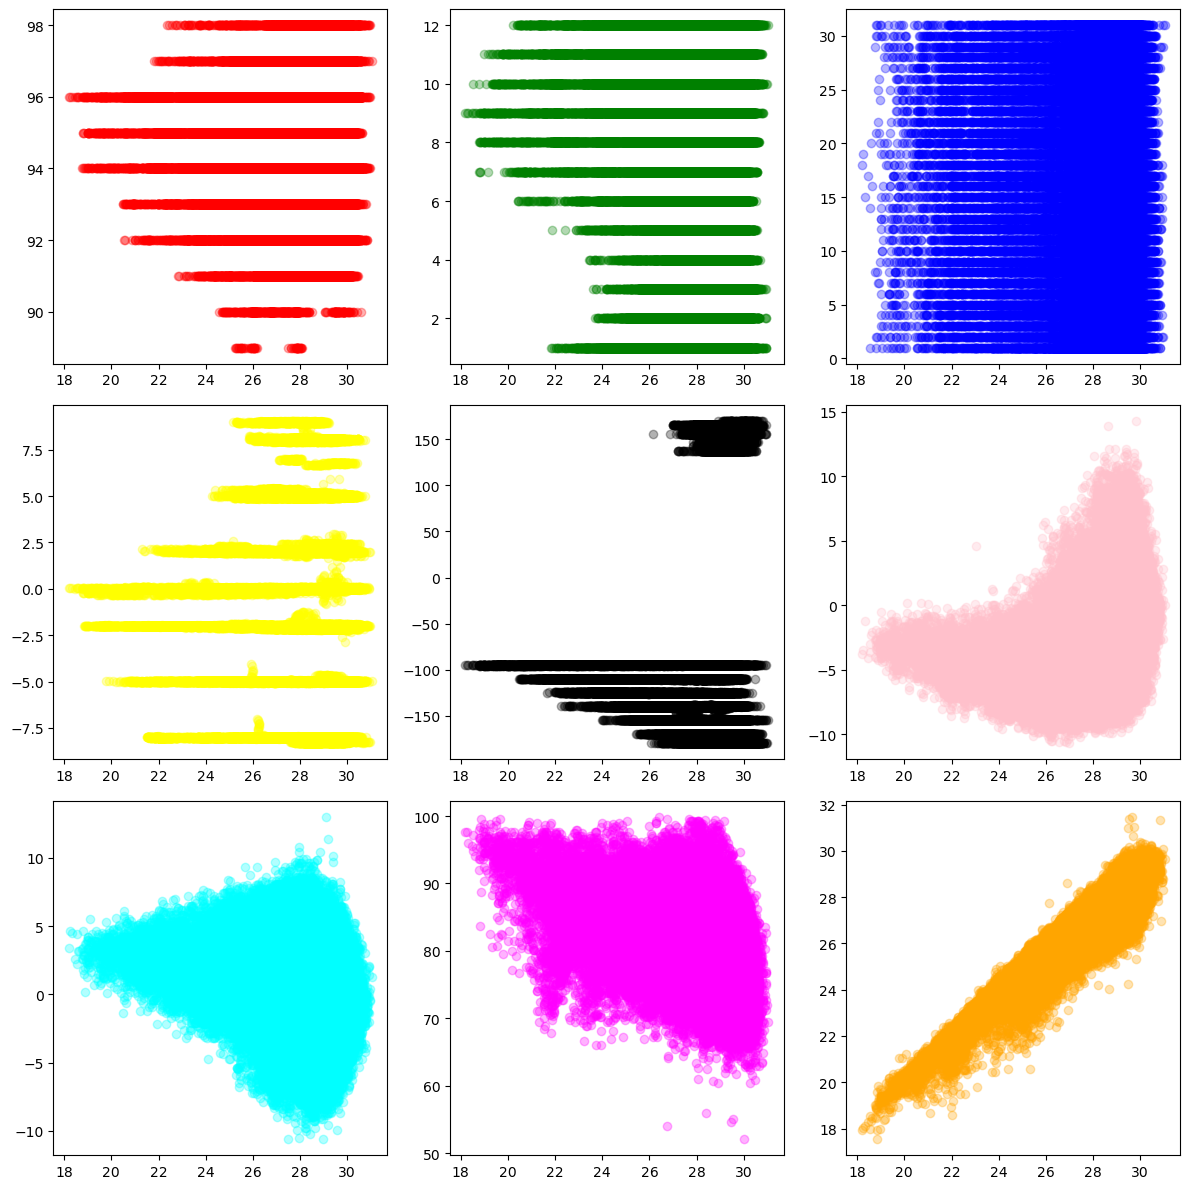

In [17]:
# Plotando scatter plots para cada feature em relação ao target:

fig, axs = plt.subplots(3,3,figsize = (12,12))
axs = axs.flatten()
for (i, ax), cor in zip(enumerate(axs),['r', 'g', 'b', 'yellow', 'k', 'pink', 'cyan', 'magenta', 'orange']):
    ax.scatter(list(df[TARGET[0]]), list(df[FEATURES[i]]), color=cor, alpha=0.3)
    
plt.tight_layout()
plt.show()